# This exemple is to calculate metrics and display a visual based on the "sites" csv that I created. 

Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the imput from the user to know the name of the file. for now we are just going to work with "sites", a csv saved in the Downloads folder

In [3]:
data1 = input('Enter name of 1st download: ')
data2 = input('Enter name of 2nd download: ')

Enter name of 1st download: sites
Enter name of 2nd download: 


Import the dataset from example.csv that should be in the downloads folder. Assign it to a variable called data_df.

In [4]:
if data1 != '':
    data1_df = pd.read_csv(('~/Downloads/{}.csv').format(data1))
if data2 != '':
    data2_df = pd.read_csv(('~/Downloads/{}.csv').format(data2))
    

In [5]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Year           30 non-null int64
Month          30 non-null int64
Site           30 non-null object
Product        30 non-null object
Ad Cost        30 non-null int64
Impressions    30 non-null int64
Paid Clicks    30 non-null int64
Conversions    30 non-null int64
State          30 non-null object
dtypes: int64(6), object(3)
memory usage: 2.2+ KB


In [6]:
data1_df.head()

,Year,Month,Site,Product,Ad Cost,Impressions,Paid Clicks,Conversions,State
0,2017,1,Clothing,t-shirts,0,1000,0,10,CA
1,2018,1,Clothing,t-shirts,20,1500,150,15,CA
2,2018,1,Clothing,t-shirts,30,2000,200,20,CA
3,2017,2,Clothing,t-shirts,40,2500,250,25,FL
4,2018,2,Clothing,t-shirts,50,3000,300,30,FL


Replace spaces by "_" and turn all to lower case

In [7]:
data1_df.columns = data1_df.columns.str.replace(' ', '_') .str.lower()
data1_df.head()

,year,month,site,product,ad_cost,impressions,paid_clicks,conversions,state
0,2017,1,Clothing,t-shirts,0,1000,0,10,CA
1,2018,1,Clothing,t-shirts,20,1500,150,15,CA
2,2018,1,Clothing,t-shirts,30,2000,200,20,CA
3,2017,2,Clothing,t-shirts,40,2500,250,25,FL
4,2018,2,Clothing,t-shirts,50,3000,300,30,FL


Remove rows with 0 paid_clicks

In [8]:
data1_df = data1_df[data1_df.paid_clicks != 0]
data1_df.head()

,year,month,site,product,ad_cost,impressions,paid_clicks,conversions,state
1,2018,1,Clothing,t-shirts,20,1500,150,15,CA
2,2018,1,Clothing,t-shirts,30,2000,200,20,CA
3,2017,2,Clothing,t-shirts,40,2500,250,25,FL
4,2018,2,Clothing,t-shirts,50,3000,300,30,FL
5,2018,2,Clothing,pants,60,3500,350,35,NY


Now will start the calculations and visuals

In [9]:
data1_df.pivot_table(data1_df, index = ["year", "month"])

ad_cost  conversions   impressions  paid_clicks
year month                                                    
2017 1      130.000000    70.000000   7000.000000   700.000000
     2      170.000000    90.000000   9000.000000   900.000000
     3      198.571429   104.285714  10428.571429  1042.857143
2018 1       98.000000    54.000000   5400.000000   540.000000
     2      165.000000    87.500000   8750.000000   875.000000
     3      144.000000    77.000000   7700.000000   770.000000

In [10]:
data1_df.pivot_table(data1_df, index = ["year", "month", "state", "site", "product"])

ad_cost  conversions  impressions  \
year month state site        product                                         
2017 1     NY    Accessories earings       130.0         70.0       7000.0   
     2     FL    Clothing    t-shirts       40.0         25.0       2500.0   
                 Shoes       flip flops    220.0        115.0      11500.0   
           NY    Shoes       flip flops    250.0        130.0      13000.0   
     3     CA    Accessories necklace      160.0         85.0       8500.0   
           FL    Accessories necklace      190.0        100.0      10000.0   
           NY    Clothing    pants          85.0         47.5       4750.0   
                 Shoes       sneakers      290.0        150.0      15000.0   
2018 1     CA    Clothing    t-shirts       25.0         17.5       1750.0   
                 Shoes       flip flops    210.0        110.0      11000.0   
           NY    Accessories earings       115.0         62.5       6250.0   
     2     CA    Accessories earings       150.0         80.0       8000.0   
           FL    Clothing    t-shirts       50.0         30.0       3000.0   
                 Shoes       flip flops    230.0        120.0      12000.0   
           NY    Clothing    pants          60.0         35.0       3500.0   
                 Shoes       flip flops    240.0        125.0      12500.0   
                             sneakers      260.0        135.0      13500.0   
     3     CA    Accessories necklace      170.0         90.0       9000.0   
           FL    Accessories necklace      190.0        100.0      10000.0   
           NY    Clothing    pants          85.0         47.5       4750.0   

                                         paid_clicks  
year month state site        product                  
2017 1     NY    Accessories earings           700.0  
     2     FL    Clothing    t-shirts          250.0  
                 Shoes       flip flops       1150.0  
           NY    Shoes       flip flops       1300.0  
     3     CA    Accessories necklace          850.0  
           FL    Accessories necklace         1000.0  
           NY    Clothing    pants             475.0  
                 Shoes       sneakers         1500.0  
2018 1     CA    Clothing    t-shirts          175.0  
                 Shoes       flip flops       1100.0  
           NY    Accessories earings           625.0  
     2     CA    Accessories earings           800.0  
           FL    Clothing    t-shirts          300.0  
                 Shoes       flip flops       1200.0  
           NY    Clothing    pants             350.0  
                 Shoes       flip flops       1250.0  
                             sneakers         1350.0  
     3     CA    Accessories necklace          900.0  
           FL    Accessories necklace         1000.0  
           NY    Clothing    pants             475.0

Create a new column based on other columns values

In [12]:
data1_df['ctr_%'] = data1_df.apply(lambda row: (row.paid_clicks/row.impressions)*100, axis=1)
data1_df['cpc'] = data1_df.apply(lambda row: row.ad_cost/row.paid_clicks, axis=1)
data1_df['cpcon'] = data1_df.apply(lambda row: row.ad_cost/row.conversions, axis=1)
data1_df
data1_df['cpc'] = data1_df['cpc'].round(decimals=2)
data1_df['cpcon'] = data1_df['cpcon'].round(decimals=2)
# data1_df['ctr_%'] = data1_df['ctr_%'].apply(np.round(0))
data1_df

,year,month,site,product,ad_cost,impressions,paid_clicks,conversions,state,ctr_%,cpc,cpcon
1,2018,1,Clothing,t-shirts,20,1500,150,15,CA,10.0,0.13,1.33
2,2018,1,Clothing,t-shirts,30,2000,200,20,CA,10.0,0.15,1.50
3,2017,2,Clothing,t-shirts,40,2500,250,25,FL,10.0,0.16,1.60
4,2018,2,Clothing,t-shirts,50,3000,300,30,FL,10.0,0.17,1.67
5,2018,2,Clothing,pants,60,3500,350,35,NY,10.0,0.17,1.71
6,2017,3,Clothing,pants,70,4000,400,40,NY,10.0,0.18,1.75
7,2018,3,Clothing,pants,80,4500,450,45,NY,10.0,0.18,1.78
8,2018,3,Clothing,pants,90,5000,500,50,NY,10.0,0.18,1.80
9,2017,3,Clothing,pants,100,5500,550,55,NY,10.0,0.18,1.82
10,2018,1,Accessories,earings,110,6000,600,60,NY,10.0,0.18,1.83


Plotting data

In [13]:
pivot = data1_df.pivot_table(["ad_cost", "impressions", "paid_clicks", "conversions"], ["site", "month"] )
pivot

ad_cost  conversions  impressions  paid_clicks
site        month                                                
Accessories 1        120.0         65.0       6500.0        650.0
            2        150.0         80.0       8000.0        800.0
            3        180.0         95.0       9500.0        950.0
Clothing    1         25.0         17.5       1750.0        175.0
            2         50.0         30.0       3000.0        300.0
            3         85.0         47.5       4750.0        475.0
Shoes       1        210.0        110.0      11000.0       1100.0
            2        240.0        125.0      12500.0       1250.0
            3        290.0        150.0      15000.0       1500.0

In [14]:
clothing = data1_df[data1_df.site == "Clothing"]
clothing
pivot = clothing.pivot_table(["ad_cost", "impressions", "paid_clicks", "conversions"], ["site", "month"] )
pivot

ad_cost  conversions  impressions  paid_clicks
site     month                                                
Clothing 1         25.0         17.5       1750.0        175.0
         2         50.0         30.0       3000.0        300.0
         3         85.0         47.5       4750.0        475.0

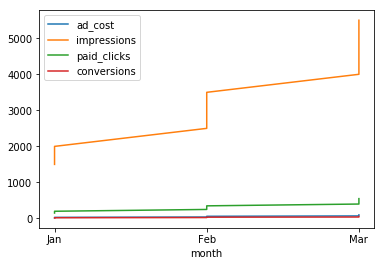

In [15]:
clothing.plot(x = "month", y=["ad_cost", "impressions", "paid_clicks", "conversions"])
plt.xticks([1,2,3],["Jan", "Feb","Mar"])

plt.show()